# Kaggle Titanic Challenge

Most of this code will be from this site: https://ahmedbesbes.com/how-to-score-08134-in-titanic-kaggle-challenge.html.
Thanks to him for providing me a tutorial on how to get started with this dataset.

## Exploring the Data

- Load the data and look into it
- Clean it
- Plot some charts to get some insight
- Form some hypothesis from the charts

### Import libraries 

In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

import pandas as pd
pd.options.display.max_columns = 100

from matplotlib import pyplot as plt

import numpy as np

import seaborn as sns

import pylab as plot
params = {
    'axes.labelsize': 'large',
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25,7]
}
plt.rcParams.update(params)

ModuleNotFoundError: No module named 'seaborn'

### Load in the training set

In [ ]:
data = pd.read_csv('./train.csv')
print(data.shape)
data.head()

### Describe the training set
Since the total number of rows is 891, then Age has 891-714 missing values. We solve this by filling all missing values with the median of the Age overall.
The median is more robust to outliers, so we don't overestimate or underestimate the distribution of Age.

In [ ]:
data.Age = data.Age.fillna(data.Age.median())
data.describe()

### Making some charts

#### Chart of Survival based on Gender
This chart answers: __How many men and women died onboard the Titanic?__

Here's how the second line works:
First, we group _data_ by _Sex_, then get the sum of each column for each level of _Sex_. This returns an aggregated DataFrame, which we then select only certain columns from; in this case, we are inspecting _Survived_ and _Died_. Then, we plot the data in these two columns.

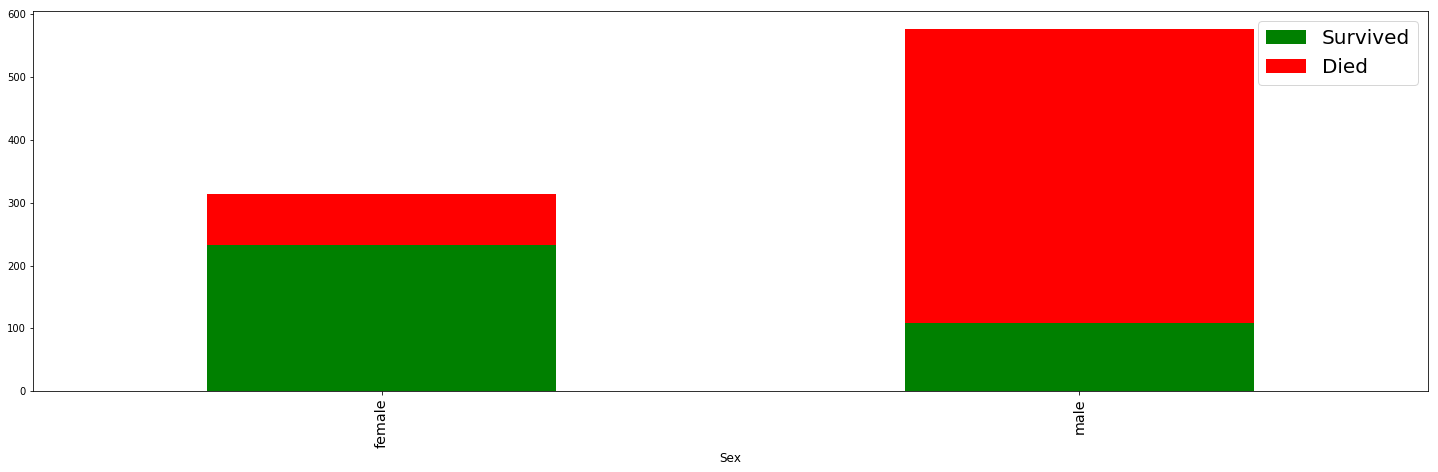

In [10]:
data['Died'] = 1 - data.Survived
data.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(25,7), stacked=True, color=['g','r'])

From the data above, men are more likely to die.

#### Chart of Survival on Age and Gender
This chart answers the question: __What is the age that most females survived? How about men?__

From the data, 

In [ ]:
fig = plt.figure(figsize=(25,7))
sns.violinplot(x='Sex', y='Age', hue='Survived', data=data, split=True, palette={0: 'r', 1: 'g'})

Here, we see that passengers around 20-40 years old are more likely to die.. However, there were more female passengers who survived the Titanic being that age. Also, it seems like age did not have an effect on females surviving. Younger and older passengers were more likely to live, too. Of the men onboard, younger men tended to survive.

#### Chart of Survival on Fare
This answers the question: __How did a passenger's fare impact survival?__

In [ ]:
figure = plt.figure(figsize=(25,7))
plt.hist([ data[data['Survived'] == 1]['Fare'], data[data['Survived'] == 0]['Fare'] ], 
        stacked=True, color=['g', 'r'], bins=50, label=['Survived', 'Died'])
plt.xlabel('Fare')
plt.ylabel('Number of Passengers')
plt.legend()

Passengers with a cheaper ticket were more likely to die, while passengers with a more expensive ticket were rescued first.

#### Chart of Age, Fare, and Survival in a Scatterplot
Here, we can see how age and fare affect survival.

In [ ]:
plt.figure(figsize=(25,7))
ax=plt.subplot()

ax.scatter(data[data['Survived'] == 1]['Age'], data[data['Survived'] == 1]['Fare'],
          c='green', s=data[data['Survived'] == 1]['Fare'])
ax.scatter(data[data['Survived'] == 0]['Age'], data[data['Survived'] == 0]['Fare'],
          c='red', s=data[data['Survived'] == 0]['Fare'])

ax.set_xlabel('Age')
ax.set_ylabel('Fare')

Here, we see that higher fares (larger green dots) meant a better chance at surviving. 

#### Chart of Passenger Class on Fare
This chart answers the question: __For each class, what is the mean Fare associated with them?__

In [ ]:
ax = plt.subplot()
ax.set_ylabel('Mean Fare')
data.groupby('Pclass').mean()['Fare'].plot(kind='bar', figsize=(25,7), ax=ax)

Above, we see that passengers riding first class had, on average, a higher fare.

#### Chart of Embarkation and Fare on Survival
This chart answers: __How does the place of Embarkation affect Survival? What is the Fare like at these places?__

In [ ]:
fig=plt.figure(figsize=(25,7))
sns.violinplot(x='Embarked', y='Fare', hue='Survived', data=data, split=True, palette={0: 'r', 1:'g'})

Here, we see that _C Station_ had a wider range of Fare prices. People who paid more here were more likely to live. We see this happening to a lesser extent in _S Station_. At _Q Station_, cheaper fares were sold. 

## Feature Engineering

Start with appending the training set and testing set together. We will create new features from the training set (the first 890 observations), and then add these to the test set.

In [ ]:
# Funtions

'''
Combines the training and testing data, and returns the combined DataFrame.
'''
def combine_data():
    train = pd.read_csv('./train.csv')
    test = pd.read_csv('./test.csv')
    
    # Extract and then remove targets from training
    train_targets = train.Survived
    train.drop(['Survived'], 1, inplace=True)
    
    combined_data = train.append(test)
    combined.reset_index(inplace=True)
    
    # Drop PassengerID and index from combined_data
    combined_data.drop(['index', 'PassengerId'], inplace=True, axis=1)
    
    return combined_data

In [ ]:
combined_data = combine_data()
print(combined_data.shape)